# Clustering and exploring Venues in the Jersey City Neighborhoods

- [Introduction](#introduction)
- [Data](#data)
- [Methodology](#methodology)
- [Analysis Part-I: Clustering and Segmenting](#clustering)
- [Analysis Part-II: Exploring House Affordibility and Restaurant Quality](#exploring)
- [Results and Discussion](#results)
- [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

The project aims to identify venues and affordable housing in Jersey City neighborhoods to find out the suitable areas to live in Jersey City. We will also explore and rate the restaurants in the Jersey City districts based on the number of likes acquired by them to narrow down the options to have excellent quality food nearby. 
In this notebook, venues and number of likes will be procured in the Jersey City, using Foursquare API. At the same time, house affordability information will be obtained from the government website to help people distinguish between the districts' house affordability and explore the best restaurants of their liking.

Whenever people decide to settle down in a new city, they start looking for affordable places to live and venues to hang out. Among the venues, restaurants usually make it to the top of the list. One primarily looks for best places to have regular meals around their neighborhood; hence we will explore only staple food restaurants.

Overall, we'll identify appropriate areas in Jersey City for people to live based on the information collected from the Foursquare API, government-based data, using a machine learning algorithm, and exploratory analysis. Once we have the plot with the venues and affordable housing in each district, developers will be able to launch an application using the same data and suggest users such information.

In [1]:
import geopandas as gpd
import gdal
import shapely

from zipfile import ZipFile
import shapefile
from shapely.geometry import shape

import io

import numpy as np # library to handle data in a vectorized manner
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import requests # library to handle requests
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


## Data <a name="data"></a>

Data with Jersey City neighborhood and district locations in the form of shape and Geojson files are obtained from Jersey City Open Data platform (**[Jersey city government website link](https://data.jerseycitynj.gov/explore/dataset/jersey-city-neighborhoods/information/)**). Foursquare API is used to fetch 100 venues within 800 meters of Jersey City neighborhoods. The Foursquare Places API provides location-based experiences with diverse information about venues, users, photos, and check-ins. The API supports real-time access to places. It allows developers to build audience segments for analysis and measurement, and JSON is the preferred response format.

House affordability of districts is determined based on the availability of the number of affordable housing units in each district, which is also obtained from the Jersey City Open Data platform  (**[Jersey city government website link](https://data.jerseycitynj.gov/explore/dataset/affordable-housing-units/export/?disjunctive.jc_ward)**). 

### Jersey City

Located between the Hudson and Hackensack Rivers, Jersey City covers nearly 15 square miles of land at the center of the New York City metropolitan region. City is known for historical points of interest.

Shapefile of the map of Jersey City neighborhoods is downloaded.  Geopandas is used to extract the boundary coordinates for each neighborhood.

In [2]:
df = gpd.read_file("zip:///neighborhoods.zip/Neighborhoods3.shp")
df

,AREA,ACRES,District,Nghbhd,Color,geometry
0,4.116014e+08,9449.068,Greenville,Our Lady of Mercy,None,"POLYGON ((602197.354 678520.304, 602603.750 67..."
1,4.116014e+08,9449.068,Downtown,Van Vorst Park,21,"POLYGON ((617677.977 688263.622, 618825.146 68..."
2,4.116014e+08,9449.068,Heights,Meadowlands,None,"POLYGON ((616200.323 702386.273, 616135.370 70..."
3,4.116014e+08,9449.068,Heights,Western Slope,None,"POLYGON ((615139.529 697738.495, 614630.955 69..."
4,4.116014e+08,9449.068,Heights,Hudson City,None,"POLYGON ((617902.283 695254.291, 617222.493 69..."
5,4.116014e+08,9449.068,Heights,Washington Village,None,"POLYGON ((618532.896 694010.330, 617975.743 69..."
6,4.116014e+08,9449.068,Heights,Mount Pleasant,None,"POLYGON ((618997.261 697527.224, 617617.053 69..."
7,4.116014e+08,9449.068,Heights,Sparrow Hill,None,"POLYGON ((614630.955 696734.867, 615715.993 69..."
8,4.116014e+08,9449.068,Heights,Resorvior,None,"POLYGON ((614702.693 694542.372, 615926.724 69..."
9,4.116014e+08,9449.068,Heights,Palisade,None,"POLYGON ((617272.410 692999.287, 617128.287 69..."


Obtaining the geographical cordinates i.e., the Latitude and Longitude variables from the projected coordinates in the shapefile.

In [3]:
df1 = df.copy()
df1.to_crs(epsg=4269, inplace=True)
df1["center"] = df1["geometry"].centroid
df1.set_geometry("center", inplace = True)
df1.head()

<ipython-input-3-3c16fd13b735>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df1["center"] = df1["geometry"].centroid


,AREA,ACRES,District,Nghbhd,Color,geometry,center
0,4.116014e+08,9449.068,Greenville,Our Lady of Mercy,None,"POLYGON ((-74.10302 40.69552, -74.10154 40.696...",POINT (-74.09659 40.70176)
1,4.116014e+08,9449.068,Downtown,Van Vorst Park,21,"POLYGON ((-74.04701 40.72205, -74.04288 40.719...",POINT (-74.04723 40.71894)
2,4.116014e+08,9449.068,Heights,Meadowlands,None,"POLYGON ((-74.05208 40.76084, -74.05231 40.760...",POINT (-74.06543 40.75446)
3,4.116014e+08,9449.068,Heights,Western Slope,None,"POLYGON ((-74.05599 40.74810, -74.05785 40.745...",POINT (-74.05501 40.75300)
4,4.116014e+08,9449.068,Heights,Hudson City,None,"POLYGON ((-74.04607 40.74124, -74.04851 40.742...",POINT (-74.04926 40.74832)


In [4]:
df1['Longitude'] = df1.center.x
df1['Latitude'] = df1.center.y
df1.head()

,AREA,ACRES,District,Nghbhd,Color,geometry,center,Longitude,Latitude
0,4.116014e+08,9449.068,Greenville,Our Lady of Mercy,None,"POLYGON ((-74.10302 40.69552, -74.10154 40.696...",POINT (-74.09659 40.70176),-74.096585,40.701758
1,4.116014e+08,9449.068,Downtown,Van Vorst Park,21,"POLYGON ((-74.04701 40.72205, -74.04288 40.719...",POINT (-74.04723 40.71894),-74.047234,40.718943
2,4.116014e+08,9449.068,Heights,Meadowlands,None,"POLYGON ((-74.05208 40.76084, -74.05231 40.760...",POINT (-74.06543 40.75446),-74.065425,40.754461
3,4.116014e+08,9449.068,Heights,Western Slope,None,"POLYGON ((-74.05599 40.74810, -74.05785 40.745...",POINT (-74.05501 40.75300),-74.055014,40.753003
4,4.116014e+08,9449.068,Heights,Hudson City,None,"POLYGON ((-74.04607 40.74124, -74.04851 40.742...",POINT (-74.04926 40.74832),-74.049258,40.748321


### Data Cleaning

Data is prepared for analysis by manipulating the format of the data and appending it with associated information obtained from various sources. 

Changing the name of the columns and keeping the desired columns

In [5]:
df2 = df1.copy()

In [6]:
df2 = df1[['District', 'Nghbhd', 'Latitude', 'Longitude']]
df2.columns = ['District', 'Neighborhood', 'Latitude', 'Longitude']
df2.head()

,District,Neighborhood,Latitude,Longitude
0,Greenville,Our Lady of Mercy,40.701758,-74.096585
1,Downtown,Van Vorst Park,40.718943,-74.047234
2,Heights,Meadowlands,40.754461,-74.065425
3,Heights,Western Slope,40.753003,-74.055014
4,Heights,Hudson City,40.748321,-74.049258


Checking if there are duplicate values for the neighborhood column, there seems to  be two (Bayside and Jackson Hill). However, the neighborhoods with the same name belong to two different districts of the Jersey City, hence are kept in the dataset.

In [7]:
df2['Neighborhood'].value_counts()

Bayside                 2
Jackson Hill            2
St Pauls                1
Newport                 1
Our Lady of Mercy       1
Powerhouse              1
Hudson City             1
Hamilton Park           1
Resorvior               1
LSP Industrial          1
Bergen Hill             1
Washington Village      1
Liberty Harbor          1
Van Vorst Park          1
Palisade                1
Sparrow Hill            1
Lafayette Industrial    1
Lafayette               1
Palus Hook              1
Hackensack              1
Harborside              1
Metroplaza              1
Waverly                 1
Port Liberte            1
Liberty State Park      1
Gregory Park            1
West Side               1
Village                 1
West End                1
The Island              1
Mill Creek              1
Canal Crossing          1
Harbor Place            1
Society Hill            1
Mount Pleasant          1
Country Village         1
Journal Square          1
St. Pete                1
Harsimus Cov

In [8]:
dupe = df2[df2['Neighborhood'].isin(['Jackson Hill', 'Bayside'])]
dupe

,District,Neighborhood,Latitude,Longitude
40,Greenville,Bayside,40.712526,-74.099631
42,Bergen-Lafayette,Jackson Hill,40.711446,-74.076838
50,Greenville,Jackson Hill,40.700791,-74.085503
52,West Side,Bayside,40.720676,-74.093009


There are 53 neighborhoods in the Jersey City districts.

In [9]:
df2.Neighborhood.shape[0]

53

Dataset is named as **jc_data** and geographical coordinates are obtained for the Jersey City using geopy library

In [10]:
jc_data = df2.copy()

In [11]:
address = 'Jersey City, New Jersey'

geolocator = Nominatim(user_agent="JC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Jersey City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Jersey City are 40.7281575, -74.0776417.


Visualization of the Jersey City neighborhoods can be seen below.

In [12]:

# create map of Toronto using latitude and longitude values
map_jc = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, district, neighborhood in zip(jc_data['Latitude'],jc_data['Longitude'],jc_data['District'],jc_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jc)  
    
map_jc

### Exploring the Jersey City neighborhood venues using foursquare API

#### Defining Foursquare Credentials and Version

Utilizing the Foursquare API to explore the neighborhoods and segment them. Foursquare credentials are hidden

In [13]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

We begin by fetching a total of all venues in Jersey City upto a range of 800 meters using the Foursquare API. The Foursquare API has the explore API which allows us to find venue information within a given radius from the given coordinates. We will use this API to find all the venues for each neighborhood.

We define the get_category_type function to get the correct category for each venue.

In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Obtaining the top 100 venues that are in Jersey City within a radius of 800 meters.

Creating the GET request URL. Naming the URL as url and sending the GET request. Also, creating a function to extract the information about the neighborhood venues in Jersey City. We'll call the API to obtain all venues for each neighborhood within the given distance. The maximum venues this API can fetch is 100, so we will fetch all venues by iteratively calling this API.

In [15]:
LIMIT = 100
radius = 800

In [16]:
def getNearbyVenues(districts, neighborhoods, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for dist, neigh, lat, lng in zip(districts, neighborhoods, latitudes, longitudes):
        print(neigh)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            dist,
            neigh,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name'],
            #v['venue']['location']['postalCode'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category',
                  'Venue id']
                  #'Venue id'
    
    return(nearby_venues)

Writing the code to run the above function on each neighborhood and creating a new dataframe called **jc_venues**.

In [17]:
jc_venues = getNearbyVenues(districts=jc_data['District'],
                             neighborhoods = jc_data['Neighborhood'],
                             latitudes=jc_data['Latitude'],
                             longitudes=jc_data['Longitude']
                            )

Our Lady of Mercy
Van Vorst Park
Meadowlands
Western Slope
Hudson City
Washington Village
Mount Pleasant
Sparrow Hill
Resorvior
Palisade
Waverly
Newport
Exchange Place
Palus Hook
Powerhouse
Metroplaza
Harborside
Hamilton Park
Van Leer
Liberty Harbor
Harbor Place
Bates
Village
West End
St Joes
The Island
St. Aedens
Mill Creek
Hackensack
Marion
Journal Square
St. Pete
Lincoln Park
Bergen Hill
Lafayette
Canal Crossing
Liberty State Park
Port Liberte
Greenville Yards
Society Hill
Bayside
St Pauls
Jackson Hill
West Side
State College
Country Village
Harsimus Cove
Gregory Park
Lafayette Industrial
Hoboken Yards
Jackson Hill
LSP Industrial
Bayside


Checking the size of the resulting dataframe

In [18]:
print(jc_venues.shape)
print(len(jc_venues))

(2772, 9)
2772


Counting the venues returned for each neighborhood

In [19]:
print('There are {} uniques categories.'.format(len(jc_venues['Venue Category'].unique())))

There are 224 uniques categories.


Venue id column is not needed for the analysis for now, hence is removed from the dataset and is termed as **jc_venues_f**

In [20]:
jc_venues_f = jc_venues.drop(columns = 'Venue id')
jc_venues_f.head()

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,Jollibee,40.704080,-74.098722,Fried Chicken Joint
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Wonder Bagels,40.706182,-74.101895,Bagel Shop
3,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant
4,Greenville,Our Lady of Mercy,40.701758,-74.096585,Vincent's Pizza,40.700129,-74.097658,Pizza Place


Above is the dataframe containing all the nearby venues for each neighborhood. It also comprise of all the eateries in area within 800 meters of the Jersey City neighborhoods, which will be filtered further in the later part of the analysis into the regular meal restaurants in the vicinity of every neighborhood. And subsequently, rate it based on number of likes given by their customers. Afterwards, we will obtain the data related to the affordable housing to determine the housing expenses of each district in the City.

This concludes the data gathering for the first phase of analysis - we're now ready to use this data for analyze different types of venues in the Jersey City neighborhoods and how it sets them together or apart.

## Methodology <a name="methodology"></a>

In the first part of our analysis, efforts will be directed at recognizing the clusters of Jersey City neighborhoods in terms of how they are similar or different from each other based on the type of venues. The clusters, as mentioned above, can be achieved by using unsupervised machine learning algorithms **(K-means Clustering)** to detect patterns. Geo-location data for the Jersey City neighborhoods are obtained, based on which **venue names**, their **type**, and **id** are collected for each neighborhood using **Foursquare API**.

Later part of the analysis aims to determine the **house affordability** of the Jersey City districts and recognize the **quality of the restaurants and common cuisines** available in those areas. At first, the venue data is filtered to contain only the eateries, which is narrowed down further to just restaurants. Thus, removing fast food places, coffee shops, cafes, and other non-food venue categories. Furthermore, restaurant-quality is determined by obtaining the number of likes given to each restaurant by its customers using the Foursquare API. It will help us specify the districts with **best house affordability and regular meal restaurants**, thus will aid in making decisions related to selecting the areas to live in Jersey City.

## Analysis Part - I: Clustering and Segmenting <a name="clustering"></a>

A dummy variable is created for each venue category type using one hot encoding and neighborhood names column is appended to the **jc_onehot**

In [21]:
# one hot encoding
jc_onehot = pd.get_dummies(jc_venues_f[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jc_onehot['Neighborhood'] = jc_venues_f['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [jc_onehot.columns[-1]] + list(jc_onehot.columns[:-1])
jc_onehot = jc_onehot[fixed_columns]

jc_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Quad,Colombian Restaurant,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Emergency Room,Empanada Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jiangsu Restaurant,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Other Great Outdoors,Other Repair Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Toll Plaza,Toy / Game Store,Track,Trade School,Trail,Train,Train Station,Tunnel,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Our Lady of Mercy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Our Lady of Mercy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
jc_onehot.shape

(2772, 225)

#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category and named as **jc_grouped**

In [23]:
jc_grouped = jc_onehot.groupby('Neighborhood').mean().reset_index()
jc_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Quad,Colombian Restaurant,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Emergency Room,Empanada Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jiangsu Restaurant,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Other Great Outdoors,Other Repair Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Toll Plaza,Toy / Game Store,Track,Trade School,Trail,Train,Train Station,Tunnel,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bates,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.093023,0.000000,0.093023,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.046512,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.023256,0.000000,0.000000,0.023256,0.023256,0.000000,0.000000,0.023256,0.023256,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.023256,0.000000,0.000000,0.000000,0.023256,0.000000,0.000000,0.0

Confirming the new size

In [24]:
jc_grouped.shape

(51, 225)

#### Printing each neighborhood along with the top 5 most common venues

In [25]:
num_top_venues = 5

for hood in jc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = jc_grouped[jc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bates----
                       venue  freq
0                        Bar  0.09
1                     Bakery  0.09
2  Middle Eastern Restaurant  0.05
3               Burger Joint  0.05
4              Grocery Store  0.05


----Bayside----
                  venue  freq
0           Pizza Place  0.04
1      Asian Restaurant  0.04
2  Fast Food Restaurant  0.04
3    Miscellaneous Shop  0.03
4                   Pub  0.03


----Bergen Hill----
                  venue  freq
0     Convenience Store  0.08
1  Fast Food Restaurant  0.06
2    Italian Restaurant  0.06
3        Sandwich Place  0.06
4    Chinese Restaurant  0.06


----Canal Crossing----
                venue  freq
0                Park  0.10
1         Coffee Shop  0.10
2  Light Rail Station  0.10
3          Restaurant  0.05
4       Deli / Bodega  0.05


----Country Village----
            venue  freq
0            Park  0.09
1     Pizza Place  0.09
2        Pharmacy  0.06
3  Baseball Field  0.06
4      Restaurant  0.03


----Exchang

#### Placing the above result into *pandas* dataframe

Writing a function to sort the venues in descending order.

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Creating the new dataframe and display the top 10 venues for each neighborhood.

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = jc_grouped['Neighborhood']

for ind in np.arange(jc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bates,Bar,Bakery,Grocery Store,Burger Joint,Middle Eastern Restaurant,Yoga Studio,Ramen Restaurant,Bubble Tea Shop,Café,Cheese Shop
1,Bayside,Pizza Place,Asian Restaurant,Fast Food Restaurant,Grocery Store,Filipino Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Pub,Supermarket
2,Bergen Hill,Convenience Store,Fast Food Restaurant,Chinese Restaurant,Sandwich Place,Italian Restaurant,Pharmacy,Café,Gym,American Restaurant,Latin American Restaurant
3,Canal Crossing,Park,Light Rail Station,Coffee Shop,Diner,Business Service,Breakfast Spot,Caribbean Restaurant,Bar,Toll Booth,Sandwich Place
4,Country Village,Pizza Place,Park,Pharmacy,Baseball Field,Bank,Bus Stop,Chinese Restaurant,Malay Restaurant,Moving Target,Fried Chicken Joint


#### Finding the best cluster number (K)

In [28]:
jc_grouped_clustering = jc_grouped.drop('Neighborhood', 1)

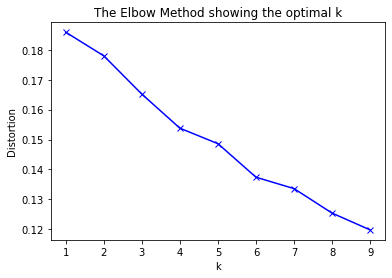

In [29]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(jc_grouped_clustering)
    kmeanModel.fit(jc_grouped_clustering)
    distortions.append(sum(np.min(cdist(jc_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / jc_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Clustering neighborhoods

Running *k*-means to cluster the neighborhood into 7 clusters.

In [31]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([2, 3, 3, 2, 3, 2, 5, 2, 3, 2, 2, 2, 2, 2, 3, 3, 0, 6, 2, 3, 2, 4,
       3, 0, 7, 2, 3, 3, 2, 3, 1, 2, 6, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 0, 3, 1])

#### Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

jc_merged = jc_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
jc_merged= jc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

jc_merged.head() # check the last columns!

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,3,Pizza Place,Pharmacy,Intersection,Baseball Field,Park,Bank,Fried Chicken Joint,Bagel Shop,Miscellaneous Shop,Chinese Restaurant
1,Downtown,Van Vorst Park,40.718943,-74.047234,2,Coffee Shop,Taco Place,Pizza Place,Café,Bakery,Grocery Store,Gym,Gym / Fitness Center,Bar,Restaurant
2,Heights,Meadowlands,40.754461,-74.065425,7,Train,Donut Shop,Train Station,Wings Joint,Liquor Store,Convenience Store,Light Rail Station,Gun Range,Empanada Restaurant,Falafel Restaurant
3,Heights,Western Slope,40.753003,-74.055014,1,Deli / Bodega,Donut Shop,Hotel,Bakery,Sandwich Place,Train,Farmers Market,Café,Liquor Store,Chinese Restaurant
4,Heights,Hudson City,40.748321,-74.049258,3,Pizza Place,Italian Restaurant,Park,Pharmacy,Cuban Restaurant,Coffee Shop,Deli / Bodega,Spanish Restaurant,Bakery,Sandwich Place


#### Visualizing the resulting clusters

In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jc_merged['Latitude'], jc_merged['Longitude'], jc_merged['Neighborhood'],jc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [34]:
cluster0 = jc_merged[jc_merged['Cluster Labels'] == 0]
cluster0

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Heights,Resorvior,40.737355,-74.056950,0,Indian Restaurant,Bakery,Café,Chinese Restaurant,Pizza Place,Fast Food Restaurant,Park,Grocery Store,Pharmacy,Sandwich Place
23,West Side,West End,40.739567,-74.071837,0,Indian Restaurant,Train,Italian Restaurant,Pharmacy,Park,Coffee Shop,Donut Shop,North Indian Restaurant,Bar,Shipping Store
29,West Side,Marion,40.733166,-74.074873,0,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Fast Food Restaurant,Pharmacy,Donut Shop,Coffee Shop,Chinese Restaurant,Pizza Place,Farmers Market
30,Journal Sq,Journal Square,40.733757,-74.063466,0,Indian Restaurant,Pizza Place,Pharmacy,Café,Chinese Restaurant,Fried Chicken Joint,Fast Food Restaurant,Bakery,Restaurant,Coffee Shop


Cluster0: Neighborhoods of The Heights, West Side and Journal Square are also clustered together due to quite a number of Indian restaurants, great neighborhood for curry lovers.

In [35]:
cluster1 = jc_merged[jc_merged['Cluster Labels'] == 1]
cluster1

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Heights,Western Slope,40.753003,-74.055014,1,Deli / Bodega,Donut Shop,Hotel,Bakery,Sandwich Place,Train,Farmers Market,Café,Liquor Store,Chinese Restaurant
9,Heights,Palisade,40.734287,-74.052132,1,Pizza Place,Deli / Bodega,Bakery,Restaurant,Café,Sandwich Place,Donut Shop,Residential Building (Apartment / Condo),Park,Bar


Cluster2: This cluster of neighborhoods in the Height district comprise of Deli/bodega.

In [36]:
cluster2 = jc_merged[jc_merged['Cluster Labels'] == 2]
cluster2

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown,Van Vorst Park,40.718943,-74.047234,2,Coffee Shop,Taco Place,Pizza Place,Café,Bakery,Grocery Store,Gym,Gym / Fitness Center,Bar,Restaurant
11,Downtown,Newport,40.729255,-74.034927,2,Cosmetics Shop,Café,Waterfront,Fast Food Restaurant,Ice Cream Shop,Hotel,Mexican Restaurant,Fried Chicken Joint,Italian Restaurant,Scenic Lookout
12,Downtown,Exchange Place,40.716458,-74.033539,2,Café,American Restaurant,Gym,Park,Coffee Shop,Liquor Store,Bar,Waterfront,Sandwich Place,Food Truck
13,Downtown,Palus Hook,40.714147,-74.038187,2,Café,American Restaurant,Coffee Shop,Gym,Park,Food Truck,Hotel,Liquor Store,Pizza Place,Bar
14,Downtown,Powerhouse,40.720634,-74.038459,2,Coffee Shop,Hotel,Pizza Place,American Restaurant,Bar,Italian Restaurant,Mexican Restaurant,Waterfront,Ice Cream Shop,Gym / Fitness Center
15,Downtown,Metroplaza,40.723239,-74.036622,2,Coffee Shop,Italian Restaurant,Cosmetics Shop,Mexican Restaurant,American Restaurant,Hotel,Ice Cream Shop,Gym,Waterfront,Gym / Fitness Center
16,Downtown,Harborside,40.719321,-74.034159,2,Coffee Shop,American Restaurant,Café,Hotel,Italian Restaurant,Pizza Place,Food Truck,Mexican Restaurant,Waterfront,Sandwich Place
17,Downtown,Hamilton Park,40.727436,-74.046672,2,Bakery,Bar,Cosmetics Shop,Gym,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Burger Joint,Cocktail Bar,Grocery Store
19,Downtown,Liberty Harbor,40.713850,-74.046525,2,American Restaurant,Chinese Restaurant,Café,Pizza Place,Harbor / Marina,Farmers Market,Park,Coffee Shop,Restaurant,Gym
20,Downtown,Harbor Place,40.714970,-74.052492,2,Harbor / Marina,Coffee Shop,Taco Place,Middle Eastern Restaurant,Movie Theater,Theme Park,Baseball Field,Farmers Market,Liquor Store,Beer Garden


Cluster2: Mostly comprise of the coffee shops, cafe, bars, American restaurants, bakery, and gyms clustering the neighborhoods of Downtown and Bergen Lafayette. 

In [37]:
cluster3 = jc_merged[jc_merged['Cluster Labels'] == 3]
cluster3

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,3,Pizza Place,Pharmacy,Intersection,Baseball Field,Park,Bank,Fried Chicken Joint,Bagel Shop,Miscellaneous Shop,Chinese Restaurant
4,Heights,Hudson City,40.748321,-74.049258,3,Pizza Place,Italian Restaurant,Park,Pharmacy,Cuban Restaurant,Coffee Shop,Deli / Bodega,Spanish Restaurant,Bakery,Sandwich Place
5,Heights,Washington Village,40.743890,-74.042810,3,Pizza Place,Italian Restaurant,Gym,Bar,Bakery,Coffee Shop,Deli / Bodega,Ice Cream Shop,Fast Food Restaurant,Pharmacy
6,Heights,Mount Pleasant,40.750580,-74.043310,3,Pizza Place,Pharmacy,Bakery,Gym,Grocery Store,Coffee Shop,Sandwich Place,Fast Food Restaurant,Deli / Bodega,Bar
7,Heights,Sparrow Hill,40.743169,-74.060263,3,Italian Restaurant,Liquor Store,Deli / Bodega,Motel,Park,Fast Food Restaurant,Lounge,Chinese Restaurant,Bookstore,Supermarket
10,Heights,Waverly,40.739196,-74.050625,3,Italian Restaurant,Donut Shop,Liquor Store,Pizza Place,Dance Studio,Fast Food Restaurant,Supermarket,Latin American Restaurant,Bar,Gym
18,Downtown,Van Leer,40.732231,-74.044864,3,Pizza Place,Gym,Deli / Bodega,Donut Shop,Café,Gas Station,Playground,Fast Food Restaurant,Liquor Store,Bakery
24,Journal Sq,St Joes,40.730209,-74.056146,3,Pizza Place,Bakery,Indian Restaurant,Deli / Bodega,Restaurant,Sandwich Place,Café,Fried Chicken Joint,Bank,Pharmacy
25,Journal Sq,The Island,40.726978,-74.058338,3,Pizza Place,Bakery,Gym,Fried Chicken Joint,Bank,Café,Restaurant,Hot Dog Joint,Pharmacy,American Restaurant
26,Journal Sq,St. Aedens,40.726519,-74.063025,3,Convenience Store,Fast Food Restaurant,Fried Chicken Joint,Mobile Phone Shop,Gym,Pizza Place,Bank,Bagel Shop,Italian Restaurant,Café


Cluster3: Neighborhoods of Greenville, The Heights, West Side, Journal Square, and Bergen-Lafayette contributes to cluster 4 and has numerous pizza places, Italian restaurants, fast food restaurants, Chinese restaurants, and quite a number of parks. Some novelty cuisines are also found in this cluster (Filipino, Spanish and Asian restaurants).

In [38]:
cluster4 = jc_merged[jc_merged['Cluster Labels'] == 4]
cluster4

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Bergen-Lafayette,Liberty State Park,40.704185,-74.050983,4,Science Museum,State / Provincial Park,Movie Theater,Food,Gift Shop,American Restaurant,Boat or Ferry,Playground,Theme Park,Farmers Market


Cluster4:Liberty State park on Bergen Lafayette district is the only neighborhood with Science Museum, hence not clustered with others. 

In [39]:
cluster5 = jc_merged[jc_merged['Cluster Labels'] == 5]
cluster5

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,Greenville,Greenville Yards,40.682226,-74.084965,5,Business Service,Park,Harbor / Marina,Cafeteria,Yoga Studio,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop


Cluster5: Greenville Yards in Greenville appears to be one of the business center with Business service

In [40]:
cluster6 = jc_merged[jc_merged['Cluster Labels'] == 6]
cluster6

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Greenville,Port Liberte,40.694202,-74.074540,6,Golf Course,Park,Go Kart Track,Harbor / Marina,Light Rail Station,Trail,Baseball Field,Waterfront,Football Stadium,Pool
51,Bergen-Lafayette,LSP Industrial,40.699189,-74.062358,6,Golf Course,State / Provincial Park,Seafood Restaurant,Other Great Outdoors,Bakery,Park,Business Service,Diner,Toll Booth,Filipino Restaurant


Cluster6: Its the only cluster with golf courses and parks

In [92]:
cluster7 = jc_merged[jc_merged['Cluster Labels'] == 7]
cluster7

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Heights,Meadowlands,40.754461,-74.065425,7,Train,Donut Shop,Train Station,Wings Joint,Liquor Store,Convenience Store,Light Rail Station,Gun Range,Empanada Restaurant,Falafel Restaurant


Cluster7: The Heights has the only train station among all the venues. Hence, clusterd separately.

## Analysis Part - II: Exploring House Affordability and Restaurant Quality <a name="exploring"></a>

### Analyzing the House affordability in various districts of Jersey City

#### Affordable Housing 

In the United States, the term **affordable housing** is used to describe housing for which the total costs of rent – or a mortgage – plus utilities is at or below, **30% of the household’s gross income**.
Districts with more number of affordable housing units are designated as most affordable and vice versa.

#### Data collection Analysis Part-II

District level data with information about number of affordable housing units is extrated

In [41]:
geo_ward = pd.read_excel('affordable-housing-units.xlsx')
geo_ward

,Ward,Affordable Units,Geo Point,Geo Shape,JC Ward
0,C,150,"40.7340588165, -74.0593233641","{""type"": ""Polygon"", ""coordinates"": [[[-74.0548...",Ward C
1,D,159,"40.7518979164, -74.0590341722","{""type"": ""Polygon"", ""coordinates"": [[[-74.0435...",Ward D
2,A,39,"40.6880876595, -74.0766561141","{""type"": ""Polygon"", ""coordinates"": [[[-74.0855...",Ward A
3,E,860,"40.7226991589, -74.0365802718","{""type"": ""Polygon"", ""coordinates"": [[[-74.0514...",Ward E
4,B,228,"40.7264389115, -74.0848041282","{""type"": ""Polygon"", ""coordinates"": [[[-74.0807...",Ward B
5,F,1562,"40.7041048593, -74.0537255744","{""type"": ""Polygon"", ""coordinates"": [[[-74.0672...",Ward F


Percentiles are calculated for affordable unit totals to determine its distribution

In [42]:
print(np.percentile(geo_ward['Affordable Units'], 25))
print(np.percentile(geo_ward['Affordable Units'], 50))
print(np.percentile(geo_ward['Affordable Units'], 75))

152.25
193.5
702.0


Based on the distribution of the affordable housing units, new column is created to label the affordability of the Jersey City districts.

In [43]:
below_avg_affordibility = geo_ward ['Affordable Units']<=153
avg_affordibility = geo_ward[(geo_ward ['Affordable Units'] >153) & (geo_ward ['Affordable Units']<=194)]
Affordable = geo_ward[(geo_ward ['Affordable Units'] >194) & (geo_ward ['Affordable Units']<=702)]
best_affordibility = geo_ward ['Affordable Units']>702

In [44]:
def conditions(s):
    if s['Affordable Units']<=153:
        return 'below avg affordibility'
    if s['Affordable Units']<=194 :
        return 'avg affordibility'
    if s['Affordable Units']<=702:
        return 'Affordable'
    if s['Affordable Units']>702:
        return 'best affordibility'
    
geo_ward['house_affordibility']= geo_ward.apply(conditions, axis=1)    

Ward column in the extracted data represents the Jersey City districts. A separate column ('District') is created to represent the same.

In [46]:
def conditions(g):
    if g['JC Ward'] == 'Ward A':
        return 'Greenville'
    if g['JC Ward'] == 'Ward B' :
        return 'West Side'
    if g['JC Ward'] == 'Ward C':
        return 'Journal Square'
    if g['JC Ward'] == 'Ward D':
        return 'The Heights'
    if g['JC Ward'] == 'Ward E':
        return 'Downtown'
    if g['JC Ward'] == 'Ward F':
        return 'Bergen-Lafayette'
    
    
geo_ward['District']= geo_ward.apply(conditions, axis=1) 

In [47]:
geo_ward 

,Ward,Affordable Units,Geo Point,Geo Shape,JC Ward,house_affordibility,District
0,C,150,"40.7340588165, -74.0593233641","{""type"": ""Polygon"", ""coordinates"": [[[-74.0548...",Ward C,below avg affordibility,Journal Square
1,D,159,"40.7518979164, -74.0590341722","{""type"": ""Polygon"", ""coordinates"": [[[-74.0435...",Ward D,avg affordibility,The Heights
2,A,39,"40.6880876595, -74.0766561141","{""type"": ""Polygon"", ""coordinates"": [[[-74.0855...",Ward A,below avg affordibility,Greenville
3,E,860,"40.7226991589, -74.0365802718","{""type"": ""Polygon"", ""coordinates"": [[[-74.0514...",Ward E,best affordibility,Downtown
4,B,228,"40.7264389115, -74.0848041282","{""type"": ""Polygon"", ""coordinates"": [[[-74.0807...",Ward B,Affordable,West Side
5,F,1562,"40.7041048593, -74.0537255744","{""type"": ""Polygon"", ""coordinates"": [[[-74.0672...",Ward F,best affordibility,Bergen-Lafayette


Data is cleaned further and undesired columns are dropped and named as **Dist_house_data**.

In [48]:
Dist_house_data = geo_ward[['District', 'house_affordibility','Affordable Units']]
Dist_house_data

,District,house_affordibility,Affordable Units
0,Journal Square,below avg affordibility,150
1,The Heights,avg affordibility,159
2,Greenville,below avg affordibility,39
3,Downtown,best affordibility,860
4,West Side,Affordable,228
5,Bergen-Lafayette,best affordibility,1562


Shapefile of the map of Jersey City districts is downloaded, converted into pandas dataframe and merged with dataframe containing house affordibility data.

In [49]:
geo_file = gpd.read_file("zip:///neighborhoods.zip/Neighborhoods4.shp")
geo_jc = geo_file[['NAME', 'geometry']]
geo_jc.columns = ['District', 'geometry']
geo_jc

,District,geometry
0,Bergen-Lafayette,"POLYGON ((616122.726 684639.696, 616139.727 68..."
1,Downtown,"POLYGON ((618571.209 694878.569, 618559.312 69..."
2,The Heights,"POLYGON ((616392.462 691581.552, 616269.088 69..."
3,Greenville,"POLYGON ((602540.255 686782.380, 604286.679 68..."
4,West Side,"POLYGON ((607665.055 685112.698, 607438.882 68..."
5,Journal Square,"POLYGON ((615430.955 687843.825, 612382.749 68..."


In [50]:
merged = geo_jc.merge(Dist_house_data, left_on = 'District', right_on = 'District')
merged

,District,geometry,house_affordibility,Affordable Units
0,Bergen-Lafayette,"POLYGON ((616122.726 684639.696, 616139.727 68...",best affordibility,1562
1,Downtown,"POLYGON ((618571.209 694878.569, 618559.312 69...",best affordibility,860
2,The Heights,"POLYGON ((616392.462 691581.552, 616269.088 69...",avg affordibility,159
3,Greenville,"POLYGON ((602540.255 686782.380, 604286.679 68...",below avg affordibility,39
4,West Side,"POLYGON ((607665.055 685112.698, 607438.882 68...",Affordable,228
5,Journal Square,"POLYGON ((615430.955 687843.825, 612382.749 68...",below avg affordibility,150


We can already see that Bergen Lafayette has most number of affordable units followed by the Downtown. Lets visualize this to have a better view.

Merged pandas dataframe is converted into Geojson format to be able to create the choropleth map to visualize the house affordibility in Jersey City districts.

In [51]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

This concludes the data collection for Analysis Part II, lets analyze and visualize the housing affordability and restaurant quality in the Jersey City.

Visualization of house affordibility in the Jersey City districts.

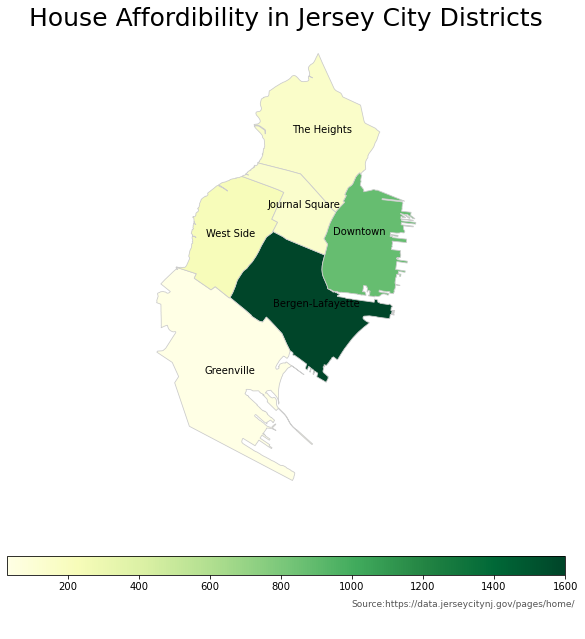

In [52]:
import descartes
#set the value column that will be visualised
variable = 'Affordable Units'
# set the range for the choropleth values
vmin, vmax = 30, 1600
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))
# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('House Affordibility in Jersey City Districts', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:https://data.jerseycitynj.gov/pages/home/',xy=(0.6, .05),  \
            xycoords='figure fraction', fontsize=9, \
            color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

# create map
merged.plot(column=variable, cmap = 'YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    plt.annotate(s=row['District'], xy=row['coords'],horizontalalignment='center')


Downtown and Bergen Lafayette districts have the most number of affordable housing units and Greenville has the least. Thus, Downtown and Bergen Lafayette  are the areas where people with median household income can buy houses. While, rest of the areas are best suited for people with above average income. Lets also look at how different districts do in terms of having nice places to have regular meals. 

Visualizing the affordable housing units distribution within the Jersey City districts on the map by using Folium chloropleth map with clusters on the top. 

In [53]:
jc_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

choropleth = folium.Choropleth(
    geo_data= geo_jc,   
    name='choropleth',
    data=merged,
    columns= ['District','Affordable Units'],
    key_on='feature.properties.District',
    fill_color='YlGn', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Available Afforable House units',
    highlight=True
).add_to(jc_map)
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['District'], style=style_function, labels=False))


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jc_merged['Latitude'],jc_merged['Longitude'], jc_merged['Neighborhood'], jc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(jc_map)
       
# display map
jc_map

Bergen-Lafayette is the most affordable option in terms of buying or renting houses followed by Downtown. However, Downtown fares better than Bergen-Lafayette in having more number of eateries, namely coffee shops, cafe, pizza places, bakeries and American restaurants. It also has more options nearby to stay fit (Gymns and fitness centers).

### Let's explore the food venues to determine their quality and distribution in Jersey City Districts

Determining the total number unique venues in the dataset

In [54]:
unique_ven = jc_venues['Venue id'].unique()
unique_ven = pd.DataFrame(unique_ven)
print(len(unique_ven))

1044


Lets find out the number of unique categories to filter out only the eateries

In [55]:
unique_cat = jc_venues['Venue Category'].unique()
unique_cat = pd.DataFrame(unique_cat).reset_index(drop = True)
unique_cat.columns = ['Category']
print(unique_cat)

                                     Category
0                          Italian Restaurant
1                         Fried Chicken Joint
2                                  Bagel Shop
3                          Spanish Restaurant
4                                 Pizza Place
5                                      Bakery
6                                    Pharmacy
7                              Sandwich Place
8                          Miscellaneous Shop
9                                        Bank
10                         Chinese Restaurant
11                                 Donut Shop
12                             Baseball Field
13                                        Bar
14                                       Park
15                               Intersection
16                               Tennis Court
17                                Auto Garage
18                              Hot Dog Joint
19                                Cheese Shop
20                             Far

There are 226 unique venue categories in total

We're interested in eateries in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. do not qualify under for having regular meals, we will filter those out from the eateries. So we will include in our dataframe only venues that have the string 'restaurant' except for Fast food restaurants in the Venue Category and name it as **only_food**.

In [56]:
values = ['Restaurant','Diner','BBQ','Steak','Salad','Breakfast']
only_food = jc_venues[jc_venues['Venue Category'].str.contains('|'.join(values))].reset_index(drop = True)
only_food.head()

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7


Checking if there are fast food options in the venue category

In [57]:
check = only_food[only_food['Venue Category'].str.contains('Fast')].reset_index(drop = True)
check

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
0,Heights,Hudson City,40.748321,-74.049258,Burger King,40.746200,-74.048992,Fast Food Restaurant,4c34ff1e452620a14114260f
1,Heights,Hudson City,40.748321,-74.049258,McDonald's,40.743788,-74.050718,Fast Food Restaurant,4c5474def5f3d13a0ab82ffa
2,Heights,Washington Village,40.743890,-74.042810,McDonald's,40.743788,-74.050718,Fast Food Restaurant,4c5474def5f3d13a0ab82ffa
3,Heights,Washington Village,40.743890,-74.042810,Burger King,40.746200,-74.048992,Fast Food Restaurant,4c34ff1e452620a14114260f
4,Heights,Mount Pleasant,40.750580,-74.043310,McDonald's,40.756408,-74.044594,Fast Food Restaurant,4c3103d1a0ced13aed07136e
5,Heights,Mount Pleasant,40.750580,-74.043310,Burger King,40.746200,-74.048992,Fast Food Restaurant,4c34ff1e452620a14114260f
6,Heights,Sparrow Hill,40.743169,-74.060263,McDonald's,40.742685,-74.060032,Fast Food Restaurant,4e4e13eabd4101d0d7a1afb9
7,Heights,Resorvior,40.737355,-74.056950,White Castle,40.735656,-74.063342,Fast Food Restaurant,4b481888f964a5201c4826e3
8,Heights,Resorvior,40.737355,-74.056950,McDonald's,40.742685,-74.060032,Fast Food Restaurant,4e4e13eabd4101d0d7a1afb9
9,Heights,Waverly,40.739196,-74.050625,McDonald's,40.743788,-74.050718,Fast Food Restaurant,4c5474def5f3d13a0ab82ffa


Filtering Fast food options from the dataframe

In [58]:
only_food = only_food[~only_food['Venue Category'].str.contains('Fast')].reset_index(drop = True)
only_food.head()

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7


Determining the total number of unique venue categories in the dataset

In [59]:
unique_ven_cat = only_food['Venue Category'].unique()
unique_ven_cat

array(['Italian Restaurant', 'Spanish Restaurant', 'Chinese Restaurant',
       'New American Restaurant', 'Japanese Restaurant',
       'Middle Eastern Restaurant', 'Portuguese Restaurant',
       'Vietnamese Restaurant', 'American Restaurant',
       'Mexican Restaurant', 'Australian Restaurant', 'Thai Restaurant',
       'Ramen Restaurant', 'Restaurant', 'Lebanese Restaurant',
       'BBQ Joint', 'Falafel Restaurant', 'Korean Restaurant',
       'Steakhouse', 'French Restaurant', 'Cuban Restaurant',
       'Latin American Restaurant', 'Colombian Restaurant',
       'Asian Restaurant', 'Hawaiian Restaurant',
       'South American Restaurant', 'Indian Restaurant',
       'Filipino Restaurant', 'North Indian Restaurant',
       'Mediterranean Restaurant', 'Sushi Restaurant',
       'Modern European Restaurant', 'Diner', 'Turkish Restaurant',
       'Theme Restaurant', 'Bed & Breakfast', 'South Indian Restaurant',
       'Caribbean Restaurant', 'African Restaurant', 'Seafood Restaurant

In [60]:
only_food.shape

(664, 9)

There are 664 venues in the dataset that are of restaurant category

In [61]:
uniq_id = only_food['Venue id'].unique()
print(len(uniq_id))

225


There are 225 unique venues id in the data set. Next, we will use these unique venue id to determine the number of likes assigned to the restaurant venues by the customers

Checking how venues with same id is repeated for each neighborhood.

In [62]:
check2 = only_food.groupby(['Venue id','Neighborhood', 'Venue'])['Venue Category'].count()
check2

Venue id                  Neighborhood          Venue                                                       
43a26468f964a520322c1fe3  Harsimus Cove         LITM                                                            1
                          Liberty Harbor        LITM                                                            1
                          Van Vorst Park        LITM                                                            1
458947a1f964a520db3f1fe3  Hoboken Yards         Satay                                                           1
45acb4cbf964a52063411fe3  Exchange Place        Honshu                                                          1
                          Gregory Park          Honshu                                                          1
                          Harborside            Honshu                                                          1
                          Palus Hook            Honshu                                       

Removing the duplicate venue id, hence, the venues from the dataset. As, we are only interested in venues, venue categories, their locations, and district information to determine the quality and distribution of restaurants in the Jersey City districts. Therefore, neighborhood information is not important for this part of the analysis. 

In [63]:
venue_likes = only_food.drop_duplicates(subset ="Venue id", keep = 'first') 
venue_likes.head()

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7


Obtaining the total number of unique venues that qualify under regular restaurant

In [64]:
venue_id_list = venue_likes['Venue id'].tolist()
print(len(venue_id_list))

225


Creating a 'for loop' to gather the number of likes given to each restaurant by the customers using the Foursquare API and creating a list called 'like_list'.

In [65]:
url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[43, 20, 5, 89, 14, 54, 83, 85, 257, 281, 83, 339, 29, 50, 55, 66, 112, 84, 100, 29, 34, 21, 246, 85, 7, 57, 119, 71, 35, 11, 13, 25, 4, 9, 17, 28, 83, 33, 21, 17, 10, 6, 6, 3, 12, 4, 6, 0, 0, 3, 42, 105, 66, 27, 4, 2, 0, 1, 18, 40, 60, 112, 16, 92, 21, 14, 36, 71, 5, 30, 19, 31, 49, 31, 5, 34, 7, 11, 4, 3, 33, 7, 6, 17, 111, 196, 170, 98, 27, 5, 82, 10, 143, 115, 65, 22, 197, 72, 39, 254, 70, 153, 36, 87, 178, 20, 133, 255, 133, 30, 18, 276, 107, 65, 33, 10, 57, 11, 9, 13, 5, 54, 75, 5, 1, 6, 35, 25, 21, 15, 13, 73, 5, 8, 17, 2, 1, 13, 6, 14, 10, 4, 2, 13, 9, 6, 19, 61, 6, 56, 15, 4, 0, 1, 24, 1, 3, 4, 1, 0, 1, 75, 12, 0, 22, 7, 3, 1, 1, 1, 2, 6, 24, 13, 0, 9, 32, 3, 3, 1, 11, 1, 8, 0, 10, 7, 0, 0, 2, 0, 26, 40, 10, 6, 5, 14, 2, 0, 1, 33, 2, 0, 259, 13, 138, 123, 18, 36, 33, 108, 28, 67, 106, 13, 38, 46, 69, 34, 42, 7, 2, 1, 0, 1, 0]


CHecking if the number of likes for each restaurant is ontained

In [66]:
print(len(like_list))
print(len(venue_id_list))

225
225


Merging the like_list with the dataframe as 'user_likes' and naming the new dataframe as **venue_likes**.

In [67]:
venue_likes['user_likes'] = like_list
venue_likes.head()

<ipython-input-67-5e7433446cb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venue_likes['user_likes'] = like_list


,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,user_likes
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3,43
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18,20
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3,5
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde,89
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7,14


Removing the observations with 0 likes for their respective restaurants, as that does not add any value to the analysis

In [68]:
venue_likes = venue_likes[venue_likes.user_likes != 0]
venue_likes.head()

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,user_likes
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3,43
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18,20
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3,5
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde,89
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7,14


Checking the characteristics of the resultant dataset

In [69]:
venue_likes.shape

(210, 10)

In [70]:
venue_likes.dtypes

District                   object
Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue                      object
Venue Latitude            float64
Venue Longitude           float64
Venue Category             object
Venue id                   object
user_likes                  int64
dtype: object

In [71]:
count_nan = venue_likes.isnull().sum()
count_nan

District                  0
Neighborhood              0
Neighborhood Latitude     0
Neighborhood Longitude    0
Venue                     0
Venue Latitude            0
Venue Longitude           0
Venue Category            0
Venue id                  0
user_likes                0
dtype: int64

Determining the distribution of user likes for each restaurant in order to create the bins for categorization

In [72]:
print(np.percentile(venue_likes['user_likes'], 25))
print(np.percentile(venue_likes['user_likes'], 50))
print(np.percentile(venue_likes['user_likes'], 75))

6.0
20.5
60.75


In [73]:
print(venue_likes['user_likes'].max())
print(venue_likes['user_likes'].min())
print(venue_likes['user_likes'].median())
print(venue_likes['user_likes'].mean())

339
1
20.5
44.72380952380952


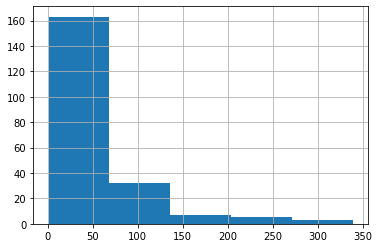

In [74]:
import matplotlib.pyplot as plt
venue_likes['user_likes'].hist(bins=5)
plt.show()

Creating bins based on the distribution based on the user likes and labelling it accordingly. We will use these labels to assign different colour to each restaurant based on the number likes acquired by them, in order to rate them. Its understandable as one could not obtain the actual ratings for each restaurant using free developers Foursqaure account, hence we are forced to settle with only the user likes information. And the quality assignment to each restaurant will be arbitary, but we will do best we can with the limited data we have.

In [75]:
bins = [1.0, 20, 45, 130, 200, 350]
labels = ['Low', 'Okay', 'Good', 'Very good', 'Excellent']
venue_likes['rating'] = pd.cut(venue_likes['user_likes'].astype(float), bins = bins, labels = labels, include_lowest = True)

In [76]:
venue_likes.head()

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,user_likes,rating
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3,43,Okay
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18,20,Low
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3,5,Low
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde,89,Good
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7,14,Low


Checking the number of restaurant that fall under each rating.

In [77]:
venue_likes.groupby('rating')['Venue'].count()

rating
Low          105
Okay          42
Good          46
Very good      9
Excellent      8
Name: Venue, dtype: int64

There seems to be fair number of restaurant that fall under good, very and excellent category. Lets visualize how each of these categories are distributed within the Jersey City districts.

In [78]:
from IPython.display import IFrame
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen', 'Excellent': 'blue'}

jc_venue_map = folium.Map(location = [latitude, longitude], zoom_start=12.5,max_zoom=20,min_zoom = 4)

choropleth = folium.Choropleth(
    geo_data= geo_jc,   
    name='choropleth',
    data=merged,
    columns= ['District','Affordable Units'],
    key_on='feature.properties.District',
    fill_color='YlGn', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Available Afforable House units',
    highlight=True
).add_to(jc_venue_map)
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['District'], style=style_function, labels=False))


for name, cat, latitude, longitude, like, rating in zip(venue_likes['Venue'],
                                             venue_likes['Venue Category'],
                                             venue_likes['Venue Latitude'], 
                                             venue_likes['Venue Longitude'],
                                             venue_likes['user_likes'],
                                             venue_likes['rating']):
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating]), 
        tooltip =   '<li><strong>Eateries : '+str(name)+
                    '<li><bold>Type : '+str(cat)+
                    '<li><bold>Likes : '+str(like)+
                    '<li><bold>Rating : '+str(rating)
        ).add_to(jc_venue_map)  
jc_venue_map
#jc_venue_map.save("maps/Venues likes.html")
#jc_venue_map.save('jc_venue_map.html')
#IFrame('jc_venue_map.html', width=900, height=1000)

**Colour Designation as per number of likes acquired by each restaurant:** \
Red: Poor \
Orange: Okay \
Green: Good \
Darkgreen: Very good \
Blue: Excellent 

Our focus is mainly in the areas with best house affordability, so If we comapare two districts with the most number of affordable housing units i.e.,Downtown followed by the Bergen-Lafayette, Downtown performs better in having most restaurants with green and blue tags, also the cuisines available are extremely diverse. Thus, Downtown has better quality and variety of restaurants available with affordable housing. Although, Bergen Lafayette has the best housing affordibility, but do not have many options to have regular meals.

### Lets explore little bit further and find out which cuisines are the most frequently found in the Jersey City

In [79]:
cat = venue_likes.groupby(['District','Venue Category','Venue', 'Venue Latitude', 'Venue Longitude',])['Neighborhood'].count().to_frame()
cat

Neighborhood
District         Venue Category             Venue                                              Venue Latitude Venue Longitude              
Bergen-Lafayette Afghan Restaurant          Rail Cafe                                          40.709155      -74.073795                  1
                 American Restaurant        Cafe Skylines                                      40.708197      -74.054737                  1
                                            Larsen's                                           40.718134      -74.075569                  1
                 Breakfast Spot             Martha's                                           40.711468      -74.062202                  1
                 Cajun / Creole Restaurant  Big Easy Chicken And Seafood                       40.718230      -74.074402                  1
                 Caribbean Restaurant       Harry’s Daughter                                   40.710904      -74.062071                  1
                 Chinese Restaurant         Hong Am Kitchen                                    40.715494      -74.068500                  1
                                            May May Kitchen                                    40.708956      -74.080882                  1
                 Diner                      Liberty Park Cafe Diner                            40.699377      -74.066787                  1
                 Dumpling Restaurant        Pinwheel Garden: Dumpling And Noodle Bar           40.710412      -74.061095                  1
                 Greek Restaurant           Dino's Restaurant                                  40.715293      -74.068471                  1
                 Italian Restaurant         Pompei Pizza                                       40.725133      -74.077686                  1
                 Latin American Restaurant  O'LaLa Empanadas                                   40.717446      -74.072934                  1
                 Mexican Restaurant         My Mexico                                          40.725078      -74.077573                  1
                 Restaurant                 Sam A.M. On Pine                                   40.710163      -74.061417                  1
                 Seafood Restaurant         Sea To You Fish Market                             40.716912      -74.073549                  1
                                            Yama Seafood                                       40.698295      -74.063521                  1
Downtown         American Restaurant        Amelia's Bistro                                    40.714071      -74.039787                  1
                                            Buddy Who’s                                        40.716125      -74.037631                  1
                                            Fire & Oak                                         40.724983      -74.035587                  1
                                            Greene Hook                                        40.714928      -74.035822                  1
                                            Liberty House                                      40.709183      -74.039917                  1
                                            Light Horse Tavern                                 40.713949      -74.038082                  1
                                            Maritime Parc                                      40.709582      -74.041558                  1
                                            Mathews Food & Drink                               40.720892      -74.042834                  1
                                            Skinner's Loft                                     40.720523      -74.043832                  1
                                            The Cheesecake Factory                             40.726846      -74.036629                  1
                                            The Hamilton Inn       

In [80]:
print(len(venue_likes['Venue Category'].unique()))

49


We can see that certain cusines are more frequently found than the others, and overall therer are 49 unique cusines 

In [81]:
venue_likes['Venue Category'].unique()

array(['Italian Restaurant', 'Spanish Restaurant', 'Chinese Restaurant',
       'New American Restaurant', 'Japanese Restaurant',
       'Middle Eastern Restaurant', 'Portuguese Restaurant',
       'Vietnamese Restaurant', 'American Restaurant',
       'Mexican Restaurant', 'Australian Restaurant', 'Thai Restaurant',
       'Ramen Restaurant', 'Restaurant', 'Lebanese Restaurant',
       'BBQ Joint', 'Falafel Restaurant', 'Korean Restaurant',
       'Steakhouse', 'French Restaurant', 'Cuban Restaurant',
       'Latin American Restaurant', 'Colombian Restaurant',
       'Asian Restaurant', 'Hawaiian Restaurant',
       'South American Restaurant', 'Indian Restaurant',
       'Filipino Restaurant', 'North Indian Restaurant',
       'Mediterranean Restaurant', 'Sushi Restaurant',
       'Modern European Restaurant', 'Diner', 'Turkish Restaurant',
       'Theme Restaurant', 'Bed & Breakfast', 'South Indian Restaurant',
       'Caribbean Restaurant', 'African Restaurant', 'Seafood Restaurant

In [82]:
venue_likes['Venue Category'].value_counts()

Italian Restaurant            25
Indian Restaurant             21
American Restaurant           19
Chinese Restaurant            18
Mexican Restaurant            12
Restaurant                    11
Spanish Restaurant             7
Diner                          7
Cuban Restaurant               5
Filipino Restaurant            5
Asian Restaurant               5
Seafood Restaurant             5
Latin American Restaurant      5
Japanese Restaurant            4
Thai Restaurant                4
Korean Restaurant              3
Steakhouse                     3
French Restaurant              3
Middle Eastern Restaurant      3
Vietnamese Restaurant          3
Caribbean Restaurant           3
Breakfast Spot                 3
Sushi Restaurant               3
BBQ Joint                      2
Greek Restaurant               2
New American Restaurant        2
Mediterranean Restaurant       2
Hawaiian Restaurant            2
Ramen Restaurant               2
Falafel Restaurant             2
South Indi

In [83]:
ind = ['North Indian Restaurant', 'South Indian Restaurant']
ame = ['Diner', 'New American Restaurant', 'Bed and Breakfast', 'Breakfast Shop']
chi = ['Jiangsu Restaurant', 'Dumpling Restaurant']
venue_likes['Venue Category'][venue_likes['Venue Category'].isin (ind) ] = "Indian Restaurant"
venue_likes['Venue Category'][venue_likes['Venue Category'].isin (ame) ] = "American Restaurant"
venue_likes['Venue Category'][venue_likes['Venue Category'].isin (chi) ] = "Chinese Restaurant"

<ipython-input-83-181d2cc68166>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venue_likes['Venue Category'][venue_likes['Venue Category'].isin (ind) ] = "Indian Restaurant"
<ipython-input-83-181d2cc68166>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venue_likes['Venue Category'][venue_likes['Venue Category'].isin (ame) ] = "American Restaurant"
<ipython-input-83-181d2cc68166>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venu

It was found that cusines like **Italian, American, Indian, Chinese and Mexican** are most frequntly available than the others, they are also happen to be the staple cuisines in the US. Other novelty cuisines are also available, but are few in number. It is also found that certain restaurants can be classified under the cuisines mentioned above, but were recognized as different category by the Foursquare API search.

In [84]:
venue_likes['Venue Category'].value_counts()

American Restaurant           28
Italian Restaurant            25
Indian Restaurant             23
Chinese Restaurant            20
Mexican Restaurant            12
Restaurant                    11
Spanish Restaurant             7
Asian Restaurant               5
Seafood Restaurant             5
Latin American Restaurant      5
Cuban Restaurant               5
Filipino Restaurant            5
Japanese Restaurant            4
Thai Restaurant                4
Steakhouse                     3
Middle Eastern Restaurant      3
Korean Restaurant              3
Breakfast Spot                 3
Caribbean Restaurant           3
French Restaurant              3
Sushi Restaurant               3
Vietnamese Restaurant          3
BBQ Joint                      2
Hawaiian Restaurant            2
Ramen Restaurant               2
Mediterranean Restaurant       2
Falafel Restaurant             2
Greek Restaurant               2
Malay Restaurant               1
Afghan Restaurant              1
Portuguese

In [86]:
print(len(venue_likes['Venue Category'].unique()))

43


In [87]:
venue_likes['Venue Category'].unique()

array(['Italian Restaurant', 'Spanish Restaurant', 'Chinese Restaurant',
       'American Restaurant', 'Japanese Restaurant',
       'Middle Eastern Restaurant', 'Portuguese Restaurant',
       'Vietnamese Restaurant', 'Mexican Restaurant',
       'Australian Restaurant', 'Thai Restaurant', 'Ramen Restaurant',
       'Restaurant', 'Lebanese Restaurant', 'BBQ Joint',
       'Falafel Restaurant', 'Korean Restaurant', 'Steakhouse',
       'French Restaurant', 'Cuban Restaurant',
       'Latin American Restaurant', 'Colombian Restaurant',
       'Asian Restaurant', 'Hawaiian Restaurant',
       'South American Restaurant', 'Indian Restaurant',
       'Filipino Restaurant', 'Mediterranean Restaurant',
       'Sushi Restaurant', 'Modern European Restaurant',
       'Turkish Restaurant', 'Theme Restaurant', 'Bed & Breakfast',
       'Caribbean Restaurant', 'African Restaurant', 'Seafood Restaurant',
       'Kebab Restaurant', 'Breakfast Spot', 'Cajun / Creole Restaurant',
       'Greek Restau

After changing the category names for few restaurants, it was found that American cuisine is most readily available, followed by Italian, Indian, Chinese and Mexican. We will create a separate variable to recognize most frequently found cuisines. And, since these cuisines are also most commonly seeked, we will keep there name as it is, however, we will call rest of the cusines as **Other Novelty Cuisines**. 

In [88]:
venue_rest_most = venue_likes.copy()

In [89]:
def cui_code(f):
    if f['Venue Category']=='American Restaurant':
        most_freq_cuisine = 'American Cuisine'
    elif f['Venue Category']=='Indian Restaurant':
        most_freq_cuisine = 'Indian Cuisine'
    elif f['Venue Category']=='Italian Restaurant':
        most_freq_cuisine = 'Italian Cuisine'
    elif f['Venue Category']=='Chinese Restaurant':
        most_freq_cuisine = 'Chinese Cuisine'
    elif f['Venue Category']=='Mexican Restaurant':
        most_freq_cuisine = 'Mexican Cuisine'
    else:
        most_freq_cuisine = 'Other Novelty Cuisine'
    return most_freq_cuisine 

venue_rest_most['most_freq_cuisine']= venue_rest_most.apply(cui_code, axis=1)     

In [90]:
venue_rest_most.head()

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,user_likes,rating,most_freq_cuisine
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3,43,Okay,Italian Cuisine
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18,20,Low,Other Novelty Cuisine
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3,5,Low,Chinese Cuisine
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,American Restaurant,56c7bf53cd101732850a7cde,89,Good,American Cuisine
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7,14,Low,Other Novelty Cuisine


### Lets visualize the distribution of most commonly seeked cuisines within the districts of Jersey City

In [91]:
from IPython.display import IFrame
color_map = {'American Cuisine':'Red', 'Indian Cuisine': 'brown', 'Italian Cuisine': 'pink','Chinese Cuisine':'purple','Mexican Cuisine': 'blue', 'Other Novelty Cuisine': 'white'}

jc_cui_map = folium.Map(location = [latitude, longitude], zoom_start=12.5,max_zoom=20,min_zoom = 4)

choropleth = folium.Choropleth(
    geo_data= geo_jc,   
    name='choropleth',
    data=merged,
    columns= ['District','Affordable Units'],
    key_on='feature.properties.District',
    fill_color='YlGn', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Available Afforable House units',
    highlight=True
).add_to(jc_cui_map)
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['District'], style=style_function, labels=False))


for name, cat, latitude, longitude, cuisine, like, rating in zip(venue_rest_most['Venue'],
                                                        venue_rest_most['Venue Category'],
                                                        venue_rest_most['Venue Latitude'], 
                                                        venue_rest_most['Venue Longitude'],
                                                        venue_rest_most['most_freq_cuisine'],
                                                        venue_rest_most['user_likes'],
                                                        venue_rest_most['rating']):
    folium.CircleMarker(
        [latitude, longitude],
        color = color_map[cuisine],fill=True, fill_color=color_map[cuisine], fill_opacity=0.7, radius = 6, 
        tooltip =   '<li><strong>Eateries : '+str(name)+
                    '<li><bold>Type : '+str(cat)+
                    '<li><bold>Likes : '+str(like)+
                    '<li><bold>Rating : '+str(rating)
        ).add_to(jc_cui_map)  
jc_cui_map
#jc_venue_map.save("maps/Venues likes.html")
#jc_venue_map.save('jc_venue_map.html')
#IFrame('jc_venue_map.html', width=900, height=1000)

**Colour Designation as per the staple cuisines:** \
Red: American \
Brown: Indian \
Pink: Italian \
Purple: Chinese \
Blue: Mexican \
White: Other Novelty Cuisines 

It is found that American cuisine restaurants are available widely across all the districts in the Jersey City, followed by Italian. Indian cuisine restaurants are concentrated in **Journal Square district**, while **The Heights** has more number of Italian restaurants. **Downtown** offers a wide variety of cuisines, predominated by American and Italian.

## Results and Discussion <a name="results"></a>

In this analysis, our goal was to study Jersey City in view of moving into the City to settle down. We looked into the similarities between the neighborhoods, if any, in terms of the type of venues in their vicinity. Most importantly, we explored affordable housing availability to select the area to buy or rent a house and look for reliable places to have regular healthy meals.

The first part of our analysis focused on clustering and segmenting the Jersey City neighborhoods using unsupervised machine learning algorithm, and looked for similarities between neighborhoods based on the common venue types. As per our analysis, the clustering and segmenting algorithm revealed that **Cluster 0** comprises neighborhoods belonging to Journal Square, The Heights, and West side districts and has many **Indian restaurants** nearby. While **cluster 1** has neighborhoods, namely, Palisade and Western Slope in The Heights district, with several **grocery shops**. Moreover, neighborhoods of **cluster 2** in Downtown and Bergen-Lafayette districts have many **coffee shops, cafes, bars, American restaurants, bakery, and gyms**, hence more opportunities to hang out. On the other hand, **Cluster 3** consists of neighborhoods belonging to Greenville, The Heights, West Side, Journal Square, and Bergen-Lafayette districts - with numerous **pizza places, Italian restaurants, fast food restaurants, Chinese restaurants, and parks**. **Cluster 4** and cluster 5 highlight the Liberty State Park neighborhood in Bergen-Lafayette district and Greenville Yards in Greenville district to have a **Science museum** and **business service**, respectively. **Cluster 6** clusters together Port Liberte and LSP Industrial neighborhoods of Greenville and Bergen-Lafayette, respectively, for having **golf courses**. **Cluster 7** has only one neighborhood (Meadowlands) associated with The Heights district that has a **train station**.

In the next portion of the analysis we collected data related to **affordable housing units** in Jersey City districts and established that **Downtown** and **Bergen-Lafayette** have the most number of affordable housing units, hence are suitable to buy or rent a house. Furthermore, we also explored the quality of regular eateries in each district. Downtown had a wide variety of cuisines up for grabs, and most of them have better performance reviews. Exploring further, we found that, **American, Italian, Indian, Chinese, and Mexican cuisines** are most commonly available in Jersey City, which are also considered as the USA's staple cuisines. American and Italian cuisine restaurants were more concentrated in **Downtown** neighborhoods. In contrast, Indian cuisine restaurants heavily clustered in **Journal Square** neighborhoods, which also seems to be geographically close to West Side and The Heights districts. Other novelties and mixed cuisine restaurants are spread across the neighborhoods of Jersey City with no discernable pattern.

## Conclusion <a name="conclusion"></a>

This analysis's objective was to find out the areas in Jersey City that are suitable to live, with regards to house affordability, availability of nearby good quality eating places, and type of venues common to different neighborhoods. Data related to the venue, their types, and quality were collected using Foursquare API. At the same time, affordable housing units data was obtained from the Jersey City government website. After collecting the data, Jersey City neighborhoods were explored, and common venue types for different neighborhoods were determined. Subsequently, house affordability for each district and associated common eating places, from across the quality spectrum were calculated and visualized.

Downtown and Bergen-Lafayette are the most affordable districts in terms of buying/renting a house, while only Downtown neighborhoods have more options to have a good quality regular meals. Indian cuisine restaurants are predominantly clustered around Journal Square. American and Italian cuisine restaurants are widely available across the districts but are mostly located around Downtown.